<a href="https://colab.research.google.com/github/ChethanaW/LURA-Lassonde-Undergradutae-Research-Project/blob/main/LURA_Multi_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries used


In [2]:
import numpy as np
import sympy 
from numpy import random
from scipy import signal
import math
import matplotlib.pyplot as plt

# FUNCTIONS

## General functions

### def sigma_sum

In [3]:
# General functions
def sigma_sum(start, end, expression):
    return sum(expression(i) for i in range(start, end))

### def gs

Gram Schmidt orthonomalization

Peptides we get are not orthogonal nor orthonomal

Peptides are send through a GS process to get their orthornormal basis vectors

[link text](https://mlwiki.org/index.php/Gram-Schmidt_Process)

In [4]:
# Ref: https://dev.artemlos.net/teaching/linear-algebra/Gram-Schmidt+example.html

def gs(X):
    Q, R = np.linalg.qr(X, mode='reduced')
    return Q

# testing
# m = np.array([[1,1,1,1,1],[1,1,0,1,2], [1,0,0,1,1], [0,0,0,0,0]])
# m, gs(m), np.transpose(gs(m))

## Detecting 1 peptide at a time

### def simulation

In [13]:
def simulation(list_of_peptides , basis_vectors, factors_of_known_peptides, hk,nb,ts,n0, nt):

  #initialization
  error_count = 0
  zero_count = 0
  one_count = 0
  other_count = 0
  # size_nb = len(nb)
  
  # tb = size_nb*ts
  binary_vector = []
  modulated_vector = []
  noisy_signal = []
  out_array = []
  results_array = []

  output ={}

  #for optimal h[k] is the reverse of h[k]
  hk = np.flip(hk)

  for i in range(0, nt):
    # Generate random bit
    x = random.choice(  list(range( len(list_of_peptides) ))  ) #  list(range( len(list_of_peptides) ))
    binary_vector.append(x)

    # modulation and adding noise
    # Generate guassian white noise
    a = sigma_sum(0, nb-1, lambda i: (hk[i])**2 )
    v = (n0*a)/(2*ts) # variance
    v2 = (n0)/(2*ts) # variance
    noise = np.random.normal(0,math.sqrt(v2), nb)

    # addition of white noise
    y = np.add(list_of_peptides[x], noise)
    
    # print("y",y )
    modulated_vector = np.append(modulated_vector,list_of_peptides[x])
    noisy_signal = np.append(noisy_signal,y)

    #process of detecting the value
    # page 48 y.sx and y.sy -> dot product with basis vectors
    # usually in 1D out = np.dot(y,hk)
    factor_out = []

    for i in range(0, len(basis_vectors)):
      factor_out.append(np.dot(y,basis_vectors[i]))

    d_norm = {}

    for i in range(0, len(factors_of_known_peptides)):
      norm = np.linalg.norm(np.array(factor_out) - np.array(factors_of_known_peptides[i]))
      d_norm[i] = norm
    
    # print("d_norm",d_norm )
    #get the key having the minimum norm
    min_norm = min(d_norm, key=d_norm.get)

    result = list_of_peptides[min_norm]
    
    results_array.append(result)
    if min_norm != x:
       error_count +=1

    out_array.append(min_norm)
  
  prob_error = (error_count/nt)
  prob_one = (one_count/nt)
  prob_other = (other_count/nt)
  prob_zero = (zero_count/nt)
  # print(prob_error)
  
  # theoratical probability error
  # theor_prob_error = ( 0.5*math.erfc( abs(ns0-z1)/math.sqrt(2*v) )*prob_zero ) + ( 0.5*math.erfc( ( (abs(z1-ns1)+abs(ns1-z2))/2 )/math.sqrt(2*v) )*prob_one ) + ( 0.5*math.erfc( abs(ns2-z2)/math.sqrt(2*v) )*prob_other )
  
  # other way
  # d = ns2-ns1
  # m = 2
  # theor_prob_error = (m-1/m)*math.erfc(d/ (2*math.sqrt(2*v)) )

  output["Generated numbers"] = binary_vector
  output["Modulated vector"] = modulated_vector
  output["Noisy signal(y)"] =  noisy_signal
  output["Output numbers"] =  out_array
  output["Resulting bits afer detection"] = results_array
  output["Simulated probablity error"] = prob_error
  # output["Theoratical probablity error"] = theor_prob_error

  return output

### def call_simulation

In [14]:
def call_simulation(list_of_peptides , basis_vectors, factors_of_known_peptides, hk,nb,ts,n0,nt):
  prob_error = []
  # theo_error = []

  output = {}

  for n0_e in n0:
    result = simulation(list_of_peptides , basis_vectors, factors_of_known_peptides, hk,nb,ts,n0_e,nt)

    prob_error.append(result["Simulated probablity error"])
    # theo_error.append(result["Theoratical probablity error"])
  
  # output["THEO"] = theo_error
  output["SIMUL"] = prob_error

  return output

## Detecting 2 peptide at a time

### def simulation2

In [5]:
def simulation2(list_of_peptides , basis_vectors, factors_of_known_peptides, hk,nb,ts,n0, nt):

  #initialization
  error_count = 0
  zero_count = 0
  one_count = 0
  other_count = 0
  # size_nb = len(nb)
  # tb = size_nb*ts
  binary_vector = []
  modulated_vector = []
  noisy_signal = []
  out_array = []
  results_array = []

  output ={}

  #for optimal h[k] is the reverse of h[k]
  hk = np.flip(hk)

  for i in range(0, nt):
    # Generate random bit
    x = random.choice(  list(range( len(list_of_peptides) ))  ) #  list(range( len(list_of_peptides) ))
    x2 = random.choice(  list(range( len(list_of_peptides) ))  ) #  list(range( len(list_of_peptides) ))
    binary_vector.append(x)
    binary_vector.append(x2)

    # modulation and adding noise
    # Generate guassian white noise
    a = sigma_sum(0, nb-1, lambda i: (hk[i])**2 )
    # v = (n0*a)/(2*ts) # variance
    v2 = (n0)/(2*ts) # variance
    noise = np.random.normal(0,math.sqrt(v2), nb)

    # addition of white noise
    y = np.add(list_of_peptides[x], noise)

    list_of_element = [list_of_peptides[x], list_of_peptides[x2],  noise]
    # print(list_of_element)
    y = np.sum(list_of_element, axis=0)
    # print(y)
    # print("y",y )
    modulated_vector = np.append(modulated_vector,list_of_peptides[x])
    noisy_signal = np.append(noisy_signal,y)

    #process of detecting the value
    # page 48 y.sx and y.sy -> dot product with basis vectors
    # usually in 1D out = np.dot(y,hk)
    factor_out = []

    for i in range(0, len(basis_vectors)):
      factor_out.append(np.dot(y,basis_vectors[i]))

    d_norm = {}

    for i in range(0, len(factors_of_known_peptides)):
      norm = np.linalg.norm(np.array(factor_out) - np.array(factors_of_known_peptides[i]))
      d_norm[i] = norm
    
    # print("d_norm",d_norm )
    #get the key having the minimum norm
    min_norm = min(d_norm, key=d_norm.get)

    result = list_of_peptides[min_norm]
    
    ##################
    y2 = np.subtract(y, result)

    factor_out = []

    for i in range(0, len(basis_vectors)):
      factor_out.append(np.dot(y2,basis_vectors[i]))

    d_norm = {}

    for i in range(0, len(factors_of_known_peptides)):
      norm = np.linalg.norm(np.array(factor_out) - np.array(factors_of_known_peptides[i]))
      d_norm[i] = norm
    
    # print("d_norm",d_norm )
    #get the key having the minimum norm
    min_norm2 = min(d_norm, key=d_norm.get)

    result2 = list_of_peptides[min_norm2]

    ##################


    results_array.append(result)
    results_array.append(result2)
    
    # if min_norm != x or min_norm2 != x2:
    #    error_count +=1

    if not np.array_equal([min_norm,min_norm2], [x,x2]):
      error_count +=1

    out_array.append(min_norm)
    out_array.append(min_norm2)
  
  prob_error = (error_count/nt)
  prob_one = (one_count/nt)
  prob_other = (other_count/nt)
  prob_zero = (zero_count/nt)
  # print(prob_error)
  
  # theoratical probability error
  # theor_prob_error = ( 0.5*math.erfc( abs(ns0-z1)/math.sqrt(2*v) )*prob_zero ) + ( 0.5*math.erfc( ( (abs(z1-ns1)+abs(ns1-z2))/2 )/math.sqrt(2*v) )*prob_one ) + ( 0.5*math.erfc( abs(ns2-z2)/math.sqrt(2*v) )*prob_other )
  
  # other way
  # d = ns2-ns1
  # m = 2
  # theor_prob_error = (m-1/m)*math.erfc(d/ (2*math.sqrt(2*v)) )

  output["Generated numbers"] = binary_vector
  output["Modulated vector"] = modulated_vector
  output["Noisy signal(y)"] =  noisy_signal
  output["Output numbers"] =  out_array
  output["Resulting bits afer detection"] = results_array
  output["Simulated probablity error"] = prob_error
  # output["Theoratical probablity error"] = theor_prob_error

  return output

### def call_simulation2

In [6]:
def call_simulation2(list_of_peptides , basis_vectors, factors_of_known_peptides, hk,nb,ts,n0,nt):
  prob_error = []
  # theo_error = []

  output = {}

  for n0_e in n0:
    result = simulation2(list_of_peptides , basis_vectors, factors_of_known_peptides, hk,nb,ts,n0_e,nt)

    prob_error.append(result["Simulated probablity error"])
    # theo_error.append(result["Theoratical probablity error"])
  
  # output["THEO"] = theo_error
  output["SIMUL"] = prob_error

  return output

# Approach 1 (with dummy data)

In [7]:
p1 = [10,20,30,50,11]
p2 = [8,11,15,13,1]
p3 = [9,10,50,100,13]
p4 = [14,27,33,51,98]
# p5 = [0,0,0,0,0]

new = np.c_[p1,p2,p3,p4]
new[2][2]
# np.column_stack((p1,p4))

new3 = np.column_stack((p1,p2,p3,p4))
new3

array([[ 10,   8,   9,  14],
       [ 20,  11,  10,  27],
       [ 30,  15,  50,  33],
       [ 50,  13, 100,  51],
       [ 11,   1,  13,  98]])

In [8]:
# basis = gs(new2) # numpy qr raw mode has a the output transposed
# new2, basis, basis[2]

basis3 = np.transpose(gs(new3)) # numpy qr raw mode has a the output transposed
new3, basis3, basis3[2]
np.sum(basis3[3,:] * basis3[3,:])

0.9999999999999998

In [9]:
num_of_basis = len(basis3)
num_of_peptides = len(np.transpose(new3))

signal_factors = {}
tmp_store_factors = []

for i in range(0,num_of_peptides):
  # print(np.transpose(new3)[i])
  tmp_store_factors = []
  for j in range(0,num_of_basis):
    # print(basis3[j])
    cur_signal = np.transpose(new3)[i]
    cur_basis = basis3[j]
    tmp_store_factors.append(np.dot(cur_signal, cur_basis))
  signal_factors[i] = tmp_store_factors

signal_factors

{0: [-63.411355449950754, 1.0658141036401503e-14, 8.881784197001252e-16, 0.0],
 1: [-22.251535075822062,
  -9.212447382181363,
  -1.7763568394002505e-15,
  1.7763568394002505e-15],
 2: [-109.3337297524269, 20.390165041257433, -21.917497758949615, 0.0],
 3: [-83.54970434564514,
  21.070315928982183,
  52.215267804373795,
  63.78130210748046]}

Euclidean distance

In [ ]:
np.linalg.norm(np.array((1,2,3)) - np.array((3,4,5)))

## With detecting 1 peptide at a time

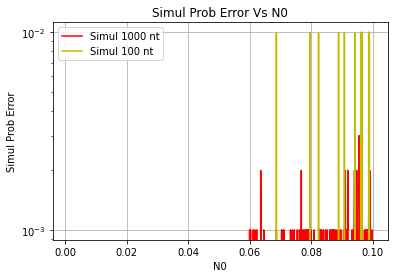

In [ ]:
# takes ~ 1m 52 mins to execute
basis_vectors = basis3
factors_of_known_peptides = signal_factors
list_of_peptides = ([p1, p2, p3, p4])

hk=[1,4,7,10,12]
nb=5
ts=10e-4
n0=np.arange(0.001 ,0.1, 0.0001)
# nt=5
# n0=np.arange(0.001 ,0.2, 0.0001)

result = call_simulation(list_of_peptides , basis_vectors, factors_of_known_peptides,  hk, nb, ts, n0, 100)
result1 = call_simulation(list_of_peptides , basis_vectors, factors_of_known_peptides,  hk, nb, ts, n0, 1000)
# result1 = get_simul_prob_trial5(sx,sy,alpha, bita,hk,nb,ts,n0,50000)
# result2 = get_simul_prob_trial5(sx,sy,alpha, bita,hk,nb,ts,n0,1000)

# plt.plot(n0, result1["THEO"], 'b', label = "Thoe 1000 nt")
plt.plot(n0, result1["SIMUL"], 'r', label = "Simul 1000 nt")
# plt.plot(n0, result2["THEO"], 'g', label = "Thoe 100 nt")
plt.plot(n0, result["SIMUL"], 'y', label = "Simul 100 nt")
# plt.plot(n0, get_data(s0, s1,s2,hk,nb,ts,n0,10000), 'g', label = "nt=10000")
plt.title('Simul Prob Error Vs N0')
plt.ylabel('Simul Prob Error')
plt.xlabel('N0')
plt.legend()
plt.grid(True)

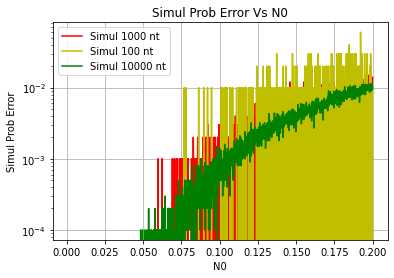

In [ ]:
basis_vectors = basis3
factors_of_known_peptides = signal_factors
list_of_peptides = ([p1, p2, p3, p4])

hk=[1,4,7,10,12]
nb=5
ts=10e-4
n0=np.arange(0.001 ,0.2, 0.0001)
# nt=5
# n0=np.arange(0.001 ,0.2, 0.0001)

result = call_simulation(list_of_peptides , basis_vectors, factors_of_known_peptides,  hk, nb, ts, n0, 100)
result1 = call_simulation(list_of_peptides , basis_vectors, factors_of_known_peptides,  hk, nb, ts, n0, 1000)
result2 = call_simulation(list_of_peptides , basis_vectors, factors_of_known_peptides,  hk, nb, ts, n0, 10000)
# result1 = get_simul_prob_trial5(sx,sy,alpha, bita,hk,nb,ts,n0,50000)
# result2 = get_simul_prob_trial5(sx,sy,alpha, bita,hk,nb,ts,n0,1000)

# plt.plot(n0, result1["THEO"], 'b', label = "Thoe 1000 nt")
plt.semilogy(n0, result1["SIMUL"], 'r', label = "Simul 1000 nt")
# plt.plot(n0, result2["THEO"], 'g', label = "Thoe 100 nt")
plt.semilogy(n0, result["SIMUL"], 'y', label = "Simul 100 nt")
plt.semilogy(n0, result2["SIMUL"], 'g', label = "Simul 10000 nt")
# plt.plot(n0, get_data(s0, s1,s2,hk,nb,ts,n0,10000), 'g', label = "nt=10000")
plt.title('Simul Prob Error Vs N0')
plt.ylabel('Simul Prob Error')
plt.xlabel('N0')
plt.legend()
plt.grid(True)

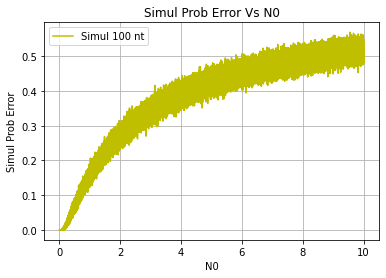

In [ ]:
basis_vectors = basis3
factors_of_known_peptides = signal_factors
list_of_peptides = ([p1, p2, p3, p4])

hk=[1,4,7,10,12]
nb=5 # 5d space
ts=10e-4
n0=np.arange(0.001 ,10, 0.0001)
# nt=5
# n0=np.arange(0.001 ,0.2, 0.0001)

result = call_simulation(list_of_peptides , basis_vectors, factors_of_known_peptides,  hk, nb, ts, n0, 1000)
# result1 = call_simulation(list_of_peptides , basis_vectors, factors_of_known_peptides,  hk, nb, ts, n0, 1000)
# result2 = call_simulation(list_of_peptides , basis_vectors, factors_of_known_peptides,  hk, nb, ts, n0, 10000)
# result1 = get_simul_prob_trial5(sx,sy,alpha, bita,hk,nb,ts,n0,50000)
# result2 = get_simul_prob_trial5(sx,sy,alpha, bita,hk,nb,ts,n0,1000)

# plt.plot(n0, result1["THEO"], 'b', label = "Thoe 1000 nt")
# plt.plot(n0, result1["SIMUL"], 'r', label = "Simul 1000 nt")
# plt.plot(n0, result2["THEO"], 'g', label = "Thoe 100 nt")
plt.plot(n0, result["SIMUL"], 'y', label = "Simul 100 nt")
# plt.plot(n0, result2["SIMUL"], 'r', label = "Simul 10000 nt")
# plt.plot(n0, get_data(s0, s1,s2,hk,nb,ts,n0,10000), 'g', label = "nt=10000")
plt.title('Simul Prob Error Vs N0')
plt.ylabel('Simul Prob Error')
plt.xlabel('N0')
plt.legend()
plt.grid(True)

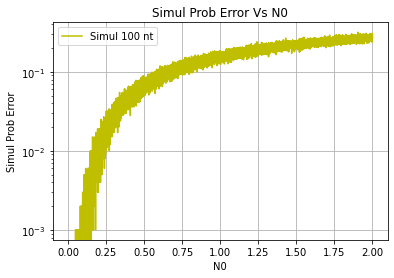

In [ ]:
# exe time: 3m
basis_vectors = basis3
factors_of_known_peptides = signal_factors
list_of_peptides = ([p1, p2, p3, p4])

hk=[1,4,7,10,12]
nb=5 # 5d space
ts=10e-4
n0=np.arange(0.001 ,2, 0.0001)
# nt=5
# n0=np.arange(0.001 ,0.2, 0.0001)

result = call_simulation(list_of_peptides , basis_vectors, factors_of_known_peptides,  hk, nb, ts, n0, 1000)
# result1 = call_simulation(list_of_peptides , basis_vectors, factors_of_known_peptides,  hk, nb, ts, n0, 1000)
# result2 = call_simulation(list_of_peptides , basis_vectors, factors_of_known_peptides,  hk, nb, ts, n0, 10000)
# result1 = get_simul_prob_trial5(sx,sy,alpha, bita,hk,nb,ts,n0,50000)
# result2 = get_simul_prob_trial5(sx,sy,alpha, bita,hk,nb,ts,n0,1000)

# plt.plot(n0, result1["THEO"], 'b', label = "Thoe 1000 nt")
# plt.plot(n0, result1["SIMUL"], 'r', label = "Simul 1000 nt")
# plt.plot(n0, result2["THEO"], 'g', label = "Thoe 100 nt")
plt.semilogy(n0, result["SIMUL"], 'y', label = "Simul 100 nt")
# plt.plot(n0, result2["SIMUL"], 'r', label = "Simul 10000 nt")
# plt.plot(n0, get_data(s0, s1,s2,hk,nb,ts,n0,10000), 'g', label = "nt=10000")
plt.title('Simul Prob Error Vs N0')
plt.ylabel('Simul Prob Error')
plt.xlabel('N0')
plt.legend()
plt.grid(True)

## with detecting 2 peptides at a time

In [12]:
basis_vectors = basis3
factors_of_known_peptides = signal_factors
list_of_peptides = ([p1, p2, p3, p4])

hk=np.random.randint(10, size=(5))
nb=5
ts=10e-4
n0=np.arange(0.001 ,0.1, 0.0001)

r = simulation2(list_of_peptides , basis_vectors, factors_of_known_peptides,  hk, nb, ts, 0.1 , 5) #10000000000
# r["Generated bits"] ,r ["Noisy signal(y)"], r["Resulting bits afer detection"]
r["Generated numbers"], r["Simulated probablity error"], r["Output numbers"] 

([3, 2, 2, 3, 0, 3, 2, 1, 0, 2], 0.6, [3, 2, 3, 2, 3, 0, 2, 1, 2, 0])

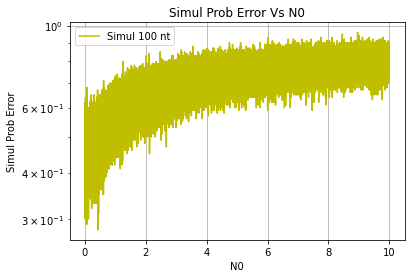

In [67]:
basis_vectors = basis3
factors_of_known_peptides = signal_factors
list_of_peptides = ([p1, p2, p3, p4])

hk=[1,4,7,10,12]
nb=5
ts=10e-4
n0=np.arange(0.001 ,10, 0.0001)
# nt=5
# n0=np.arange(0.001 ,0.2, 0.0001)

result = call_simulation2(list_of_peptides , basis_vectors, factors_of_known_peptides,  hk, nb, ts, n0, 100)
# result1 = call_simulation2(list_of_peptides , basis_vectors, factors_of_known_peptides,  hk, nb, ts, n0, 1000)
# result1 = get_simul_prob_trial5(sx,sy,alpha, bita,hk,nb,ts,n0,50000)
# result2 = get_simul_prob_trial5(sx,sy,alpha, bita,hk,nb,ts,n0,1000)

# plt.plot(n0, result1["THEO"], 'b', label = "Thoe 1000 nt")
# plt.plot(n0, result1["SIMUL"], 'r', label = "Simul 1000 nt")
# plt.plot(n0, result2["THEO"], 'g', label = "Thoe 100 nt")
plt.semilogy(n0, result["SIMUL"], 'y', label = "Simul 100 nt")
# plt.plot(n0, get_data(s0, s1,s2,hk,nb,ts,n0,10000), 'g', label = "nt=10000")
plt.title('Simul Prob Error Vs N0')
plt.ylabel('Simul Prob Error')
plt.xlabel('N0')
plt.legend()
plt.grid(True)

## comparison

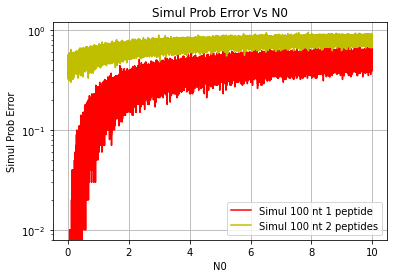

In [15]:
# around 58 m
basis_vectors = basis3
factors_of_known_peptides = signal_factors
list_of_peptides = ([p1, p2, p3, p4])

hk=[1,4,7,10,12]
nb=5
ts=10e-4
n0=np.arange(0.001 ,10, 0.0001)
# nt=5
# n0=np.arange(0.001 ,0.2, 0.0001)

result = call_simulation2(list_of_peptides , basis_vectors, factors_of_known_peptides,  hk, nb, ts, n0, 100) # around 30 mins
result1 = call_simulation(list_of_peptides , basis_vectors, factors_of_known_peptides,  hk, nb, ts, n0, 100)
# result1 = get_simul_prob_trial5(sx,sy,alpha, bita,hk,nb,ts,n0,50000)
# result2 = get_simul_prob_trial5(sx,sy,alpha, bita,hk,nb,ts,n0,1000)

# plt.plot(n0, result1["THEO"], 'b', label = "Thoe 1000 nt")
plt.semilogy(n0, result1["SIMUL"], 'r', label = "Simul 100 nt 1 peptide")
# plt.plot(n0, result2["THEO"], 'g', label = "Thoe 100 nt")
plt.semilogy(n0, result["SIMUL"], 'y', label = "Simul 100 nt 2 peptides")
# plt.plot(n0, get_data(s0, s1,s2,hk,nb,ts,n0,10000), 'g', label = "nt=10000")
plt.title('Simul Prob Error Vs N0')
plt.ylabel('Simul Prob Error')
plt.xlabel('N0')
plt.legend()
plt.grid(True)

# Testing First Steps - Getting peptide -> Orthogonormalization -> getting factors

In [ ]:
# getting peptides from a dataset
p1 = [1,2,3,4,5, 6,7, 8, 9,10]
p2 = [1,2,3,4,5]
p3 = [1,2,3,4,5]
p4 = [1,2,3]
p5 = [1,2,3,4,5, 6,7]

# asuming its coming as a list of arrays
input = ([p1, p2, p3, p4, p5])

######---------- converting input peptides to identical size -----------######
tmp = []
num_of_peptides = len(input) # assuming I know the number of peptides we have
max = np.max([ len(input[i]) for i in range (0, len(input)) ]) # lenght of the peptide with highest number of peaks

for i in range(0,num_of_peptides): # looping through all the peptides
  fill_number = max - len(input[i]) # check how many zeros should be added to represent the max dimension needed

  if (fill_number > 0 ):  
    input[i] = np.pad(input[i], (0, fill_number), 'constant') # add zeros to the end

  tmp.append(input[i])

# making sure all the vectors are linearly independent
rref_matrix, inds = sympy.Matrix(tmp).T.rref()  # ref https://docs.sympy.org/latest/tutorial/matrices.html  rref:reduced row echelon form

for x in range(0,len(tmp)):
  if x not in inds:
    results = np.delete(tmp, obj=x, axis=0)

modified_input =  np.column_stack((results)) # stack column wise all the equally sized peptides
modified_input

######---------- getting the orthogonomal vectors from the given peptides -----------######
def gs(X):
    Q, R = np.linalg.qr(X, mode='reduced')
    return Q

basis3 = np.transpose(gs(modified_input)) # numpy qr raw mode has a the output transposed
basis3

# check if the basis vectors are correct 
np.sum(basis3[2,:] * basis3[3,:]), np.sum(basis3[3,:] * basis3[3,:]), sum(np.square(np.transpose(basis3)))

np.transpose(modified_input), basis3

######---------- getting the signal factors with all basis vectors for each peptide  -----------######
num_of_basis = len(basis3)
num_of_peptides = len(np.transpose(modified_input))

signal_factors = {}
tmp_store_factors = []

for i in range(0,num_of_peptides):
  # print(np.transpose(modified_input)[i])
  tmp_store_factors = []
  for j in range(0,num_of_basis):
    # print(basis3[j])
    cur_signal = np.transpose(modified_input)[i]
    cur_basis = basis3[j]
    # print(cur_signal ,cur_basis )
    tmp_store_factors.append(np.dot(cur_signal, cur_basis))
  signal_factors[i] = tmp_store_factors

input, np.transpose(modified_input), np.round(basis3), signal_factors



([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
  array([1, 2, 3, 4, 5, 0, 0, 0, 0, 0]),
  array([1, 2, 3, 4, 5, 0, 0, 0, 0, 0]),
  array([1, 2, 3, 0, 0, 0, 0, 0, 0, 0]),
  array([1, 2, 3, 4, 5, 6, 7, 0, 0, 0])],
 array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 1,  2,  3,  4,  5,  0,  0,  0,  0,  0],
        [ 1,  2,  3,  0,  0,  0,  0,  0,  0,  0],
        [ 1,  2,  3,  4,  5,  6,  7,  0,  0,  0]]),
 array([[-0., -0., -0., -0., -0., -0., -0., -0., -0., -1.],
        [-0., -0., -0., -0., -1.,  0.,  0.,  0.,  0.,  0.],
        [-0., -0., -1.,  0.,  0., -0., -0., -0., -0., -0.],
        [ 0., -0., -0.,  0., -0.,  1.,  1., -0., -0., -0.]]),
 {0: [-19.621416870348586,
   -6.106226635438361e-16,
   -8.881784197001252e-16,
   2.220446049250313e-16],
  1: [-2.803059552906941,
   -6.866065623255952,
   -1.1102230246251565e-16,
   -1.0672375712542041e-16],
  2: [-0.7135060680126757,
   -1.747725795010606,
   -3.2305361221264244,
   -4.7810609670327135e-17],
  3: [-7.135060680126758,
   -5.0975335

In [ ]:
# possible input format

xy1 = [[1, 2], [3, 58], [4, 9],[7, 35]]
xy2 = [[5, 22], [6, 158], [10, 19],[17, 135]]
xy3 = [[11, 342], [13, 568], [14, 90],[17, 305]]

inputxy = ([xy1,xy2,xy3])
# newp = np.zeros(20)

# # def formatinput():

# for i in range(0, len(xy1)):
#   # if i < len(p4):
#   newp[xy1[i][0]] = xy1[i][1]

# len(inputxy)

output = []

for i in range(0, len(inputxy)):
  tmp = inputxy[i]
  newp = np.zeros(20)
  for j in range(0, len(tmp) ):
    # if i < len(p4):
    newp[tmp[j][0]] = tmp[j][1]

  output.append(newp)

output

_, inds = sympy.Matrix(output).T.rref()
output, _, inds

([array([ 0.,  2.,  0., 58.,  9.,  0.,  0., 35.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([  0.,   0.,   0.,   0.,   0.,  22., 158.,   0.,   0.,   0.,  19.,
           0.,   0.,   0.,   0.,   0.,   0., 135.,   0.,   0.]),
  array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         342.,   0., 568.,  90.,   0.,   0., 305.,   0.,   0.])],
 Matrix([
 [  1,   0,   0],
 [0.0,   1,   0],
 [  0,   0,   1],
 [0.0, 0.0, 0.0],
 [  0,   0,   0],
 [  0,   0,   0],
 [  0,   0,   0],
 [  0,   0,   0],
 [0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0],
 [  0,   0,   0],
 [  0,   0,   0],
 [0.0, 0.0, 0.0],
 [  0,   0,   0],
 [  0,   0,   0],
 [0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0]]),
 (0, 1, 2))

# Approach 2 (With small portion of real data)


#### Peptides

In [ ]:
#peptide samples only 10 for now
peptides = {}

#0
peptides["APKIGFSGPK/2"]  = [[129.1022,1285509],
[147.1128,91627],
[169.097,1124187],
[226.1547,1495660],
[244.1651,288493],
[279.1827,148722],
[297.1918,1045083],
[301.1862,178956],
[388.2188,199671],
[392.2642,245394],
[410.2758,1073893],
[417.2471,3680657],
[465.7735,6886946],
[467.2992,110364],
[535.2871,225439],
[574.3021,26582],
[592.3082,3353078],
[614.363,88795],
[687.3795,96941],
[701.3976,36718],
[705.3923,4106544],
[740.4152,25478],
[758.4194,160231],
[815.4813,33698],
[833.4874,2494322],
[930.5396,291737]]

#1
peptides["AQNLEAISR/2"] = [[175.1187,1394108],
[182.0923,246261],
[183.0764,12760439],
[200.1029,30334056],
[245.1238,437168],
[262.1508,6199661],
[297.1201,2258717],
[314.1455,12047771],
[344.7057,182335],
[375.2345,4682900],
[384.6985,444842],
[401.7217,566085],
[409.2193,280162],
[410.2045,1104568],
[427.2295,3173435],
[446.2718,14664051],
[448.7298,360401],
[465.7533,2493070],
[538.2597,431020],
[539.2459,1835992],
[556.2741,1121055],
[557.3022,1362793],
[575.3145,28194982],
[610.2851,511419],
[627.3035,727117],
[670.3854,265669],
[688.3984,15231507],
[723.3677,275053],
[784.433,739736],
[785.4152,5124613],
[802.4409,65364052],
[913.4724,4827612]]

#2
peptides["AQQLEWVK/2"] = [[129.1021,	1157985],
[130.0863,	1236825],
[147.1128,	4394865],
[183.0764,	8073642],
[200.1029,	14785822],
[246.1812,	2107888],
[311.1356,	978651],
[328.1614,	3300523],
[401.7254,	811456],
[424.2191,	144806],
[432.2598,	4212431],
[441.244	,692477],
[465.7576,	1332947],
[543.2914,	565047],
[561.3033,	4602554],
[570.2836,	505291],
[674.3879,	9254963],
[739.3427,	128338],
[756.3716,	359650],
[784.4348,	3749250],
[785.4227,	7751332],
[802.4456,	27014034],
[838.4088,	199813],
[855.4285,	630150],
[913.4774,	4494342]]

#3
peptides["ASLVYHRR/2"] = [[175.1193,95979],
[254.1508,25344],
[272.1613,16108],
[316.1735,8731],
[365.7063,16149],
[371.2303,13519],
[422.2485,17026],
[465.7683,12177],
[468.2809,9665],
[614.3143,29251],
[631.3409,14917],
[713.3816,19061],
[827.4481,47976]]

#4
peptides["ASVLLVMLR/2"] = [[175.118,40740],
[240.1341,253489],
[258.1447,161344],
[271.1776,11530],
[288.202,37756],
[353.2169,18720],
[371.2297,97513],
[372.743,13171],
[419.2425,128635],
[422.2789,18285],
[466.3019,38387],
[484.3131,32445],
[501.2835,65424],
[518.3116,424879],
[631.3952,583843],
[744.4797,446120],
[843.5506,81838],
[930.5768,23770]]

#5
peptides["ATELLTLLK/2"] = [[129.1023,491633],
[130.0863,772000],
[147.1127,3071400],
[155.0815,4523618],
[173.092,11170167],
[187.1449,55566],
[242.1865,215146],
[260.1966,2648436],
[284.1237,6724752],
[294.2087,634252],
[302.1343,3467028],
[350.7524,101317],
[373.2808,2481405],
[397.2069,628105],
[397.2634,621668],
[415.2175,1812217],
[415.2708,206077],
[447.786,131991],
[456.3181,108737],
[465.7961,3547553],
[474.3284,8373267],
[528.3046,500678],
[569.399,378498],
[587.4122,11790595],
[611.3412,656578],
[629.3525,222446],
[682.4846,263328],
[700.4962,16131034],
[724.4243,872470],
[742.4333,189242],
[811.5275,2366093],
[829.5386,26321716],
[837.5045,354690],
[838.4991,133178],
[912.5784,517997],
[930.5881,2242445]]

#6
peptides["ATVQQLEGR/2"] = [[155.0817,1223354],
[158.0922,45719],
[173.0922,6203154],
[175.1189,598050],
[215.1137,98705],
[232.1404,5924745],
[237.6368,108337],
[254.1499,9350733],
[272.1603,749155],
[301.6655,178001],
[343.1717,311782],
[344.1594,80111],
[361.183,6181849],
[365.6958,4737159],
[382.2082,664194],
[383.1933,264531],
[398.2072,356693],
[400.2191,1556556],
[415.2299,7096909],
[447.7406,46697],
[456.2569,118382],
[457.2415,1007298],
[465.7539,1532933],
[474.2672,8932651],
[510.2685,480294],
[511.2538,394022],
[528.2773,966848],
[584.3153,1122574],
[585.301,1624769],
[602.3257,16111406],
[623.3522,313754],
[641.3629,487791],
[712.3748,995315],
[713.3594,3762280],
[730.3842,16743101],
[752.3929,182108],
[770.4115,183568],
[809.4152,25685],
[811.4445,60182],
[812.4272,315423],
[827.4206,30748],
[829.4534,7379150],
[912.4897,72445],
[913.4778,58720],
[930.5024,336864]]

#7
peptides["ATYACFLR/2"] = [[155.0814,845446],
[173.092,7785594],
[175.1189,2767236],
[271.1763,165978],
[288.2029,1341244],
[298.1546,1235834],
[318.1444,6480190],
[333.6746,426448],
[336.1551,2021284],
[389.1808,322814],
[407.1918,1318040],
[415.2047,9335276],
[418.2434,200229],
[435.271,4391800],
[448.7054,564705],
[465.7282,1700765],
[549.2162,59226],
[567.2224,64448],
[577.2916,64608],
[578.2734,335895],
[595.3017,20178246],
[649.3105,93610],
[666.3387,26695994],
[696.2811,169583],
[812.3775,214980],
[829.4019,27268916],
[912.4372,302732],
[930.4499,1133818]]

#8
peptides["AVAGQGELTR/2"] = [[158.0927,14632],
[171.1128,2492414],
[175.1188,142206],
[242.1499,538994],
[276.1665,256101],
[299.1714,173300],
[352.1904,365685],
[380.701,159864],
[389.2506,333415],
[410.2034,66088],
[416.2195,927443],
[427.2289,129839],
[465.7534,201368],
[467.2266,15502],
[484.2545,38559],
[500.286,11125],
[518.2938,231915],
[557.3021,28366],
[575.3146,2116742],
[595.2799,13510],
[596.2723,16258],
[613.2998,23551],
[685.3648,32810],
[686.3485,162315],
[703.3731,589737],
[709.3543,14668],
[742.3817,18118],
[743.3696,102587],
[760.3947,2242718],
[813.4199,45667],
[831.432,4765188],
[930.5045,26912]]

#9
peptides["AVLVDMEPK/2"] = [[129.1024,382222],
[130.0862,48003],
[147.1128,214780],
[171.1128,4863774],
[187.1087,24694],
[226.1549,237580],
[244.1655,2338059],
[284.1968,1820314],
[355.1976,298629],
[359.6753,61856],
[373.2089,199789],
[383.2682,177096],
[416.2175,1108798],
[465.7497,101586],
[480.2805,26024],
[498.2923,41424],
[504.2486,1063627],
[601.2713,46467],
[602.2527,54280],
[611.321,20609],
[619.2756,4711527],
[700.3345,26384],
[718.3438,4763570],
[758.3726,23690],
[813.4235,73834],
[831.4282,8211120],
[930.4929,137452]]

#10
peptides["CIAAYLYK/2"] = [[129.1023,166724],
[130.0863,61319],
[144.0106,26148],
[147.1128,198078],
[161.0377,43164],
[256.1096,13392],
[257.0946,76525],
[274.1218,461159],
[292.165,29255],
[310.1757,285901],
[328.1316,70336],
[345.1582,196604],
[364.7049,20972],
[399.1679,40421],
[416.1946,65231],
[421.2476,21924],
[423.2604,145347],
[562.2291,16231],
[579.2617,36056],
[586.3235,248191],
[657.3604,498981],
[674.3316,30906],
[675.3138,8798],
[692.3421,29127],
[728.3973,2196250],
[841.4806,174788],
[855.4075,24949]]

#11
peptides["CNDPNIIR/2"] = [[144.0117,305686],
[158.0923,57226],
[161.0372,33958],
[175.119,2616945],
[257.0692,302615],
[258.0539,2445800],
[258.1689,50350],
[271.1761,70771],
[275.0807,3983378],
[288.2029,4324413],
[306.695,1662988],
[364.2084,489368],
[372.0969,812409],
[373.0808,2925586],
[390.1077,5512154],
[401.2863,1064957],
[470.1354,167792],
[498.3044,213704],
[515.3298,1595856],
[584.1783,677178],
[594.3759,54603],
[595.3562,452619],
[601.2032,237237],
[612.3823,19253622],
[696.2786,46860],
[697.2589,797450],
[709.3986,160771],
[710.3859,230251],
[714.2887,683721],
[727.4096,7433910],
[824.4288,630384],
[827.3689,276142],
[841.4526,2145102]]

In [ ]:
peptides.keys()
len(peptides) , list(peptides.keys())[0]

# np.round(peptides.get(list(peptides.keys())[0]))
len(peptides.get(list(peptides.keys())[0]))
len(peptides)

list(peptides.keys()), list(peptides.keys())[9]



(['APKIGFSGPK/2',
  'AQNLEAISR/2',
  'AQQLEWVK/2',
  'ASLVYHRR/2',
  'ASVLLVMLR/2',
  'ATELLTLLK/2',
  'ATVQQLEGR/2',
  'ATYACFLR/2',
  'AVAGQGELTR/2',
  'AVLVDMEPK/2',
  'CIAAYLYK/2',
  'CNDPNIIR/2'],
 'AVLVDMEPK/2')

#### executions

In [ ]:
output = []
list_of_peptides = list(peptides.keys())

for i in list_of_peptides:
  list_of_peaks = peptides.get(i)
  newp = np.zeros(1000)
  for j in range(0, len(list_of_peaks) ):
    # if i < len(p4):
    newp[round(list_of_peaks[j][0])] = list_of_peaks[j][1] # round bcs the m/z ratio are not integers

  output.append(newp)

modified_input =  np.column_stack((output)) # stack column wise all the equally sized peptides

##### check point
# len(output[0])
# modified_input[0]
# modified_input.shape
# modified_input[:, 1] 

######---------- getting the orthogonomal vectors from the given peptides -----------######
def gs(X):
    Q, R = np.linalg.qr(X, mode='reduced')
    return Q

basis3 = np.transpose(gs(modified_input)) # numpy qr raw mode has a the output transposed

######---------- getting the signal factors with all basis vectors for each peptide  -----------######
num_of_basis = len(basis3)
num_of_peptides = len(np.transpose(modified_input))

signal_factors = {}
tmp_store_factors = []

for i in range(0,num_of_peptides):
  # print(np.transpose(modified_input)[i])
  tmp_store_factors = []
  for j in range(0,num_of_basis):
    # print(basis3[j])
    cur_signal = np.transpose(modified_input)[i]
    cur_basis = basis3[j]
    # print(cur_signal ,cur_basis )
    tmp_store_factors.append(np.dot(cur_signal, cur_basis))
  signal_factors[i] = tmp_store_factors

output, np.transpose(modified_input), np.round(basis3), signal_factors

In [ ]:
basis_vectors = basis3
factors_of_known_peptides = signal_factors
list_of_peptides = output

hk=np.random.randint(10, size=(1000))
nb=1000
ts=10e-4
n0=np.arange(0.001 ,0.1, 0.0001)

r = simulation(list_of_peptides , basis_vectors, factors_of_known_peptides,  hk, nb, ts, 10000000 , 5) #10000000000
# r["Generated bits"] ,r ["Noisy signal(y)"], r["Resulting bits afer detection"]
r["Generated numbers"], r["Simulated probablity error"], r["Output numbers"] 

([1, 5, 7, 5, 9], 0.0, [1, 5, 7, 5, 9])

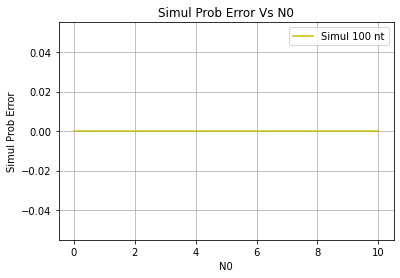

In [ ]:

basis_vectors = basis3
factors_of_known_peptides = signal_factors
list_of_peptides = output

hk = np.random.randint(10, size=(1000))
nb=1000
ts=10e-4
n0=np.arange(0.001 ,10, 0.0001)
# nt=5
# n0=np.arange(0.001 ,0.2, 0.0001)

result = call_simulation(list_of_peptides , basis_vectors, factors_of_known_peptides,  hk, nb, ts, n0, 100)
# result1 = call_simulation(list_of_peptides , basis_vectors, factors_of_known_peptides,  hk, nb, ts, n0, 1000)
# result1 = get_simul_prob_trial5(sx,sy,alpha, bita,hk,nb,ts,n0,50000)
# result2 = get_simul_prob_trial5(sx,sy,alpha, bita,hk,nb,ts,n0,1000)

# plt.plot(n0, result1["THEO"], 'b', label = "Thoe 1000 nt")
# plt.plot(n0, result1["SIMUL"], 'r', label = "Simul 1000 nt")
# plt.plot(n0, result2["THEO"], 'g', label = "Thoe 100 nt")
plt.plot(n0, result["SIMUL"], 'y', label = "Simul 100 nt")
# plt.plot(n0, get_data(s0, s1,s2,hk,nb,ts,n0,10000), 'g', label = "nt=10000")
plt.title('Simul Prob Error Vs N0')
plt.ylabel('Simul Prob Error')
plt.xlabel('N0')
plt.legend()
plt.grid(True)

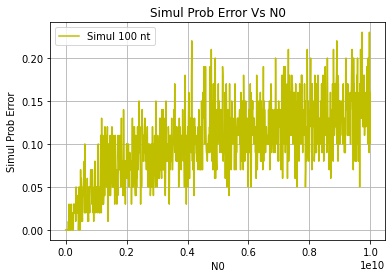

In [ ]:

basis_vectors = basis3
factors_of_known_peptides = signal_factors
list_of_peptides = output

hk = np.random.randint(10, size=(1000))
nb=1000
ts=10e-4
n0=np.arange(1000 ,10000000000, 10000000)
# nt=5
# n0=np.arange(0.001 ,0.2, 0.0001)

result = call_simulation(list_of_peptides , basis_vectors, factors_of_known_peptides,  hk, nb, ts, n0, 100)
# result1 = call_simulation(list_of_peptides , basis_vectors, factors_of_known_peptides,  hk, nb, ts, n0, 1000)
# result1 = get_simul_prob_trial5(sx,sy,alpha, bita,hk,nb,ts,n0,50000)
# result2 = get_simul_prob_trial5(sx,sy,alpha, bita,hk,nb,ts,n0,1000)

# plt.plot(n0, result1["THEO"], 'b', label = "Thoe 1000 nt")
# plt.plot(n0, result1["SIMUL"], 'r', label = "Simul 1000 nt")
# plt.plot(n0, result2["THEO"], 'g', label = "Thoe 100 nt")
plt.plot(n0, result["SIMUL"], 'y', label = "Simul 100 nt")
# plt.plot(n0, get_data(s0, s1,s2,hk,nb,ts,n0,10000), 'g', label = "nt=10000")
plt.title('Simul Prob Error Vs N0')
plt.ylabel('Simul Prob Error')
plt.xlabel('N0')
plt.legend()
plt.grid(True)

In [ ]:
len(np.arange(1 ,10000, 10))

1000

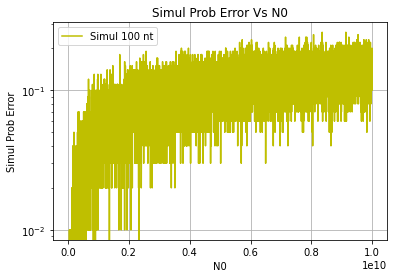

In [ ]:

basis_vectors = basis3
factors_of_known_peptides = signal_factors
list_of_peptides = output

hk = np.random.randint(10, size=(1000))
nb=1000
ts=10e-4
n0=np.arange(1 ,10000000000, 1000000)
# nt=5
# n0=np.arange(0.001 ,0.2, 0.0001)

result = call_simulation(list_of_peptides , basis_vectors, factors_of_known_peptides,  hk, nb, ts, n0, 100)
# result1 = call_simulation(list_of_peptides , basis_vectors, factors_of_known_peptides,  hk, nb, ts, n0, 1000)
# result1 = get_simul_prob_trial5(sx,sy,alpha, bita,hk,nb,ts,n0,50000)
# result2 = get_simul_prob_trial5(sx,sy,alpha, bita,hk,nb,ts,n0,1000)

# plt.plot(n0, result1["THEO"], 'b', label = "Thoe 1000 nt")
# plt.plot(n0, result1["SIMUL"], 'r', label = "Simul 1000 nt")
# plt.plot(n0, result2["THEO"], 'g', label = "Thoe 100 nt")
plt.semilogy(n0, result["SIMUL"], 'y', label = "Simul 100 nt")
# plt.plot(n0, get_data(s0, s1,s2,hk,nb,ts,n0,10000), 'g', label = "nt=10000")
plt.title('Simul Prob Error Vs N0')
plt.ylabel('Simul Prob Error')
plt.xlabel('N0')
plt.legend()
plt.grid(True)

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  func(*args, **kwargs)


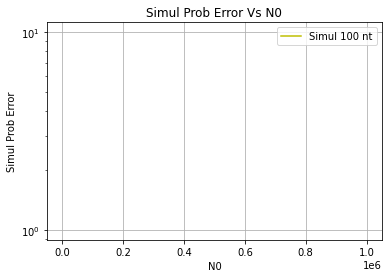

In [ ]:
basis_vectors = basis3
factors_of_known_peptides = signal_factors
list_of_peptides = output

hk = np.random.randint(10, size=(1000))
nb=1000
ts=10e-4
n0=np.arange(1 ,1000000, 10)
# nt=5
# n0=np.arange(0.001 ,0.2, 0.0001)

result = call_simulation(list_of_peptides , basis_vectors, factors_of_known_peptides,  hk, nb, ts, n0, 100)
# result1 = call_simulation(list_of_peptides , basis_vectors, factors_of_known_peptides,  hk, nb, ts, n0, 1000)
# result1 = get_simul_prob_trial5(sx,sy,alpha, bita,hk,nb,ts,n0,50000)
# result2 = get_simul_prob_trial5(sx,sy,alpha, bita,hk,nb,ts,n0,1000)

# plt.plot(n0, result1["THEO"], 'b', label = "Thoe 1000 nt")
# plt.plot(n0, result1["SIMUL"], 'r', label = "Simul 1000 nt")
# plt.plot(n0, result2["THEO"], 'g', label = "Thoe 100 nt")
plt.semilogy(n0, result["SIMUL"], 'y', label = "Simul 100 nt")
# plt.plot(n0, get_data(s0, s1,s2,hk,nb,ts,n0,10000), 'g', label = "nt=10000")
plt.title('Simul Prob Error Vs N0')
plt.ylabel('Simul Prob Error')
plt.xlabel('N0')
plt.legend()
plt.grid(True)